# Feature Engineering

In [1]:
import os
from pathlib import Path

from src.config import Config
from src.data import load_prices_sentiment
from src.features import create_features_and_target
from src.plots import plot_correlation_heatmap
from src.utils import save_csv, set_seed

In [2]:
cfg = Config(Path("../config/config.yaml"))
rng = set_seed(cfg.runtime.seed)

2025-08-20 15:51:01,621 - INFO - src.utils - Global random seed set to 42


In [3]:
df_price_sent = load_prices_sentiment(Path(cfg.data.processed_dir) / cfg.data.name_prices_sentiment)
df_price_sent.head()

,date,open,high,low,close,volume,adj_close,pos,neu,neg,...,emb_7,emb_8,emb_9,emb_10,emb_11,emb_12,emb_13,emb_14,emb_15,emb_16
0,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0.080308,0.723097,0.196594,...,0.151610,-0.232541,0.348419,0.543224,-0.179494,0.553609,-0.347092,-0.518843,0.684280,0.227482
1,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,0.168894,0.695768,0.135338,...,0.135462,-0.261237,0.484763,0.363776,-0.225049,0.529768,-0.494232,-0.317024,0.633304,0.377935
2,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0.040929,0.696532,0.262539,...,0.295696,-0.275410,0.380731,0.385763,-0.265997,0.593549,-0.534134,-0.397291,0.669396,0.230531
3,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,0.003527,0.833299,0.163175,...,0.166847,-0.208769,0.382932,0.774060,-0.113826,0.511805,-0.298713,-0.347355,0.684939,0.299247
4,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,0.022426,0.928612,0.048962,...,0.036605,-0.267980,0.408606,0.557198,-0.188280,0.686246,-0.483639,-0.340268,0.713771,0.236775


In [4]:
df_full = create_features_and_target(df_price_sent, 30)
df_full.head()

,date,open,high,low,close,volume,adj_close,pos,neu,neg,...,sma_10,ema_10,lag_25,sma_25,ema_25,quarter,dow,q_mean,q_std,q_skew
26,2008-09-16,10905.620117,11093.219727,10742.700195,11059.019531,494760000,11059.019531,0.037859,0.649857,0.312283,...,-0.004057,-0.003995,0.004085,-0.002534,-0.002034,3,1,-0.002886,0.016242,-0.717302
27,2008-09-17,11056.580078,11057.309570,10595.900391,10609.660156,463200000,10609.660156,0.020132,0.695084,0.284784,...,-0.008344,-0.010810,-0.011943,-0.003716,-0.005068,3,2,-0.002280,0.016211,-0.771974
28,2008-09-18,10609.009766,11076.440430,10459.440430,11019.690430,488060000,11019.690430,0.076621,0.751735,0.171643,...,-0.001518,-0.001951,-0.009451,-0.001821,-0.001761,3,3,-0.003732,0.017596,-0.770069
29,2008-09-19,11027.509766,11483.049805,11026.700195,11388.440430,655110000,11388.440430,0.000513,0.772076,0.227411,...,0.001482,0.004389,0.007168,-0.000791,0.000906,3,4,-0.002244,0.018976,-0.421549
30,2008-09-22,11394.419922,11394.580078,10992.200195,11015.690430,213210000,11015.690430,0.100864,0.619301,0.279835,...,-0.004396,-0.002460,0.003778,-0.002273,-0.001724,3,0,-0.001032,0.019745,-0.341408


In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963 entries, 26 to 1988
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1963 non-null   datetime64[ns]
 1   open           1963 non-null   float64       
 2   high           1963 non-null   float64       
 3   low            1963 non-null   float64       
 4   close          1963 non-null   float64       
 5   volume         1963 non-null   int64         
 6   adj_close      1963 non-null   float64       
 7   pos            1963 non-null   float64       
 8   neu            1963 non-null   float64       
 9   neg            1963 non-null   float64       
 10  pos_minus_neg  1963 non-null   float64       
 11  emb_0          1963 non-null   float64       
 12  emb_1          1963 non-null   float64       
 13  emb_2          1963 non-null   float64       
 14  emb_3          1963 non-null   float64       
 15  emb_4          1963 

In [6]:
df_full

,date,open,high,low,close,volume,adj_close,pos,neu,neg,...,sma_10,ema_10,lag_25,sma_25,ema_25,quarter,dow,q_mean,q_std,q_skew
26,2008-09-16,10905.620117,11093.219727,10742.700195,11059.019531,494760000,11059.019531,0.037859,0.649857,0.312283,...,-0.004057,-0.003995,0.004085,-0.002534,-0.002034,3,1,-0.002886,0.016242,-0.717302
27,2008-09-17,11056.580078,11057.309570,10595.900391,10609.660156,463200000,10609.660156,0.020132,0.695084,0.284784,...,-0.008344,-0.010810,-0.011943,-0.003716,-0.005068,3,2,-0.002280,0.016211,-0.771974
28,2008-09-18,10609.009766,11076.440430,10459.440430,11019.690430,488060000,11019.690430,0.076621,0.751735,0.171643,...,-0.001518,-0.001951,-0.009451,-0.001821,-0.001761,3,3,-0.003732,0.017596,-0.770069
29,2008-09-19,11027.509766,11483.049805,11026.700195,11388.440430,655110000,11388.440430,0.000513,0.772076,0.227411,...,0.001482,0.004389,0.007168,-0.000791,0.000906,3,4,-0.002244,0.018976,-0.421549
30,2008-09-22,11394.419922,11394.580078,10992.200195,11015.690430,213210000,11015.690430,0.100864,0.619301,0.279835,...,-0.004396,-0.002460,0.003778,-0.002273,-0.001724,3,0,-0.001032,0.019745,-0.341408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,0.065429,0.684537,0.250034,...,-0.003397,-0.006286,0.003752,-0.000833,-0.002734,2,0,0.000002,0.009594,-0.183067
1985,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,0.086932,0.714076,0.198991,...,-0.001511,-0.002307,-0.000458,-0.000191,-0.001324,2,1,-0.000028,0.009608,-0.180243
1986,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,0.114712,0.673349,0.211939,...,0.000309,0.001064,0.012110,-0.000026,0.000027,2,2,0.000003,0.009624,-0.180164
1987,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,0.040575,0.727080,0.232345,...,0.001104,0.003273,0.008182,0.000175,0.001041,2,3,0.000036,0.009641,-0.179361


In [7]:
os.makedirs(cfg.data.processed_dir, exist_ok=True)
save_csv(Path(cfg.data.processed_dir) / cfg.data.name_features_full, df_full)

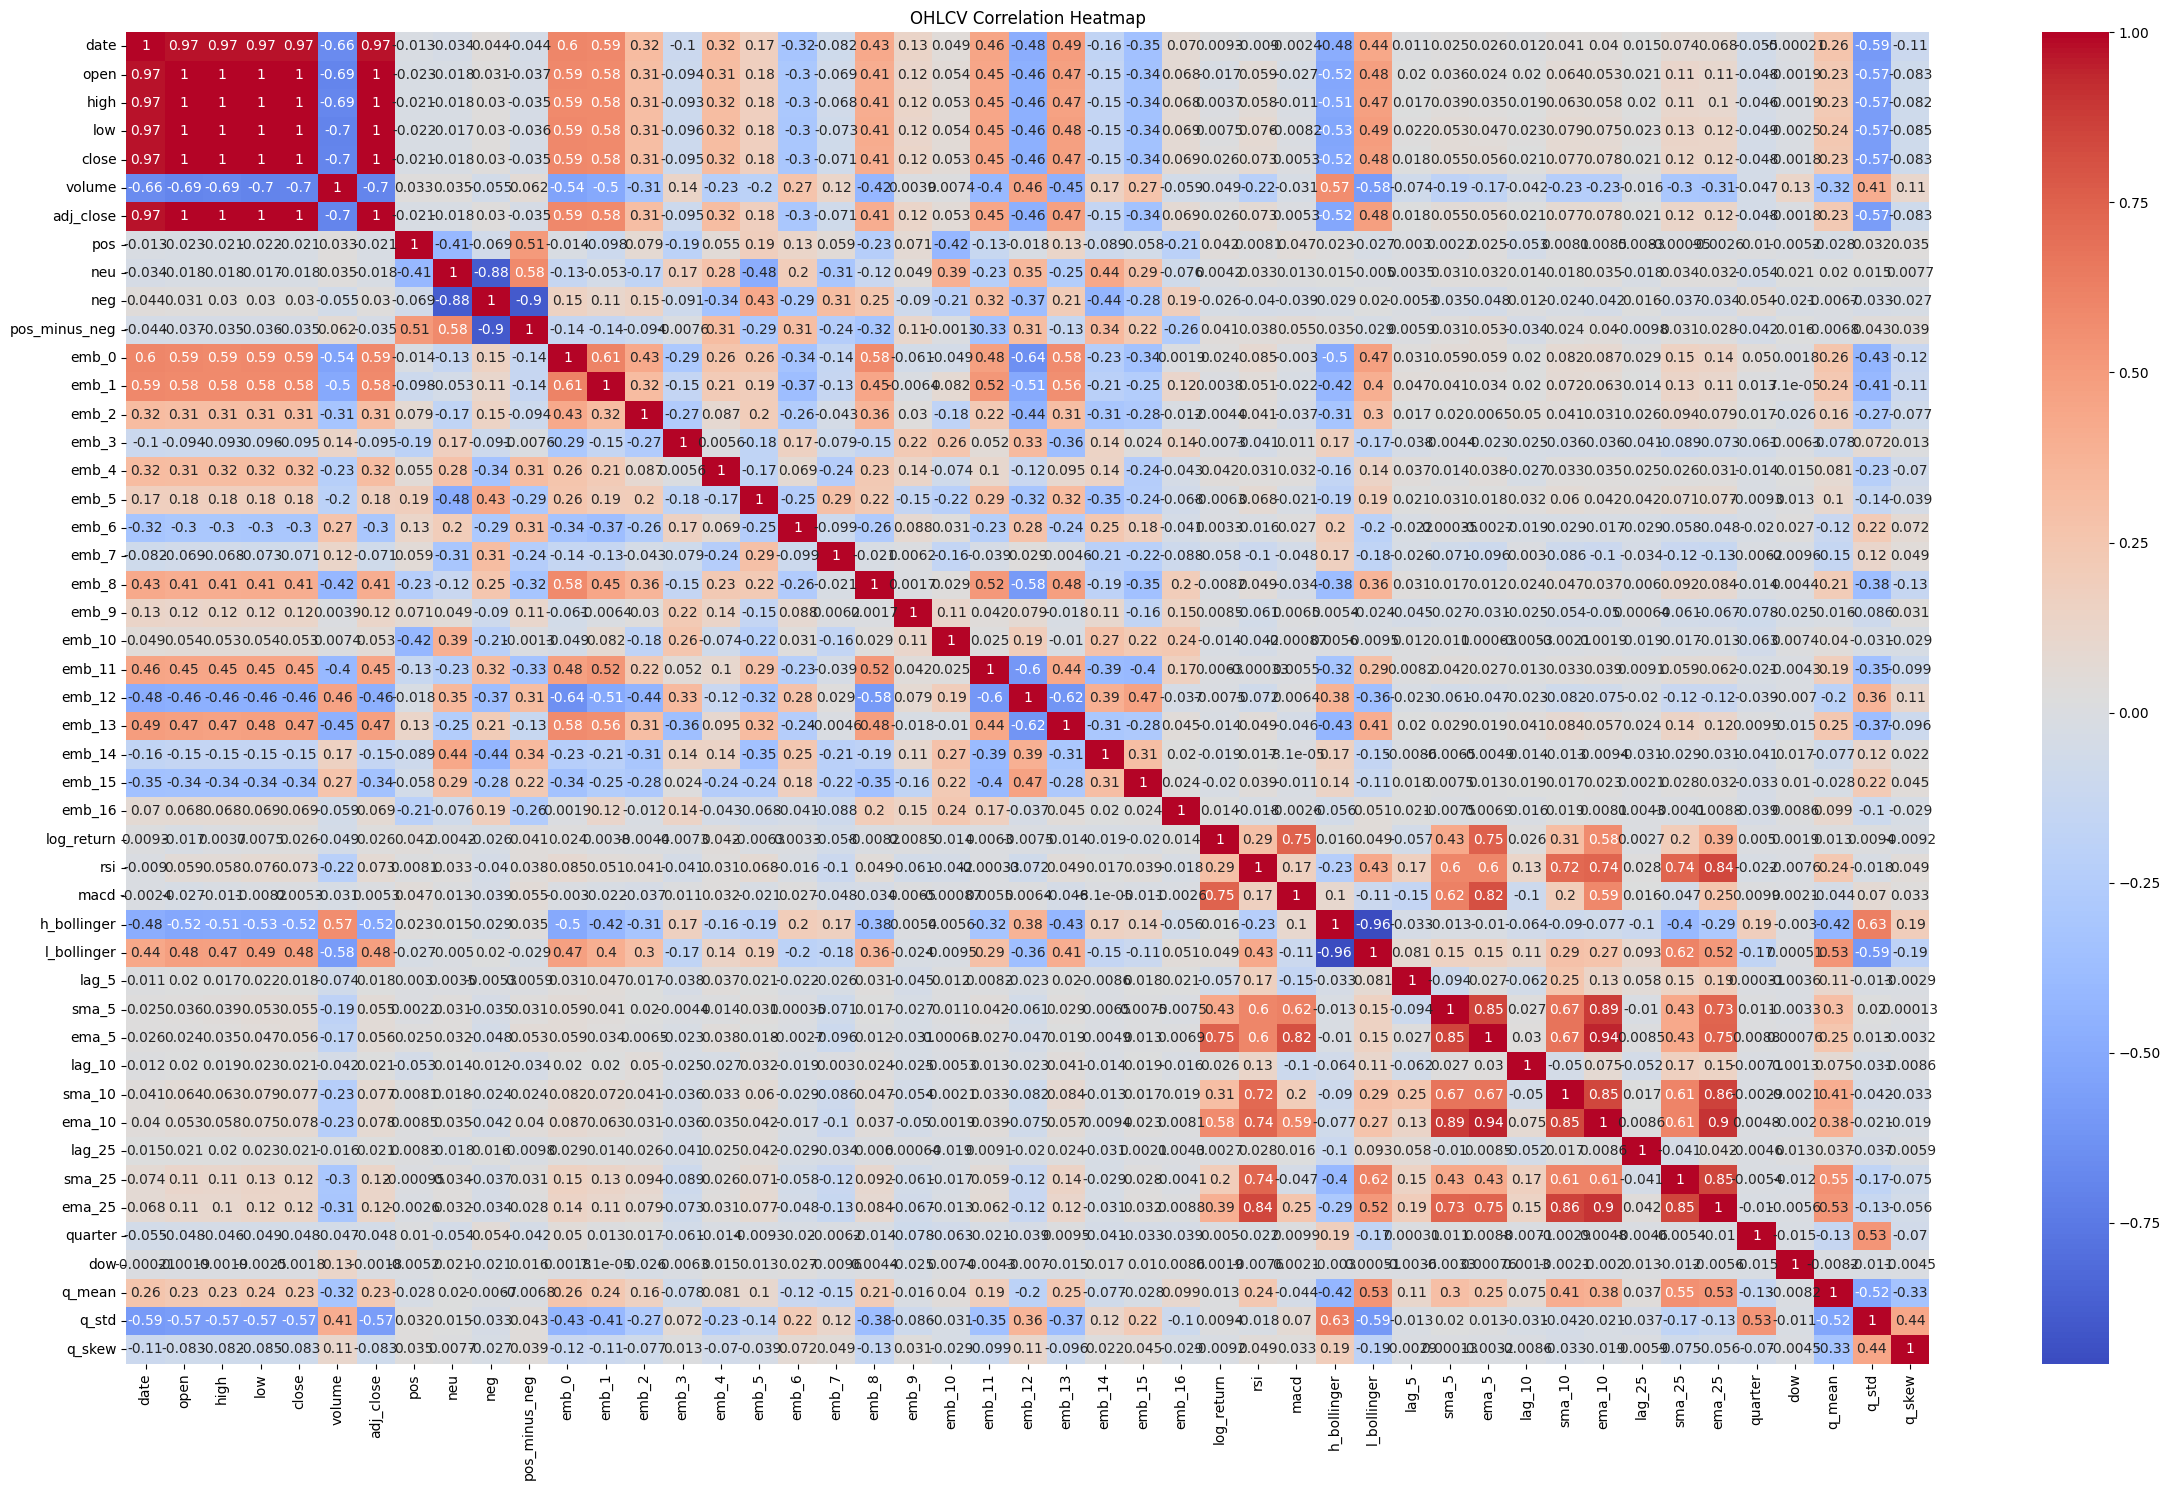

In [8]:
cols = [c for c in df_full.columns if not (c == "target" or c.startswith("target_"))]

fig_dir = Path(cfg.data.fig_dir)
plot_correlation_heatmap(df_full, cols, fig_dir / "full_correlation_heatmap.png", figsize = (24, 15))